<a href="https://colab.research.google.com/github/Kawarjeet/Image_classification_using_cnn/blob/main/image_classification_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The project classifies the images in the dataset as cats and dogs
#### Dogs == 1 Cats == 0


####Downloading dataset over the internet

1.   !wget command is used to download files over the internet. Wget package is preinstalled on google colab so we do not need to install it explicitly.
2.   syntax: wget [options] [url]



In [2]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

--2022-01-23 07:45:23--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.33.136.128, 2600:1402:6800:283::e59, 2600:1402:6800:297::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.33.136.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_3367a.zip’

kagglecatsanddogs_3 100%[===================>] 786.68M   224MB/s    in 3.5s    

2022-01-23 07:45:27 (222 MB/s) - ‘kagglecatsanddogs_3367a.zip’ saved [824894548/824894548]



In [ ]:
!unzip kagglecatsanddogs_3367a.zip

##Import Modules

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import random
import seaborn as sns
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')
import os

##Create Dataframe for Input and Output

In [ ]:
input_path = []
label = []

for class_name in os.listdir("PetImages"):
    for path in os.listdir("PetImages/"+class_name):
      if class_name== 'Cat':
        label.append(0)
      else:
        label.append(1)
      input_path.append(os.path.join("PetImages", class_name, path))
print(input_path[0], label[0])
print("label:" + str(label))

In [6]:
len(label)

25002

In [7]:
len(input_path)

25002

In [9]:
df = pd.DataFrame()
df['images']= input_path
df['label'] = label
print(df.head()) #head() returns top 5 rows in the dataset, and tail() returns last 5 rows
# frac=1 means returns all rows in random order
df= df.sample(frac=1)
# df.sample is the function to return random sample items
print(df.head())
df = df.sample(frac=1).reset_index(drop=True)
df['label'] = df['label'].astype('str')  #converting the label values to type string otherwise it shows error while fitting the model in model.fit
df.head()

                    images  label
0    PetImages/Dog/490.jpg      1
1   PetImages/Dog/9798.jpg      1
2  PetImages/Dog/10804.jpg      1
3   PetImages/Dog/2385.jpg      1
4   PetImages/Dog/2459.jpg      1
                        images  label
3846   PetImages/Dog/12441.jpg      1
3170    PetImages/Dog/2852.jpg      1
141      PetImages/Dog/108.jpg      1
18070  PetImages/Cat/11929.jpg      0
9119    PetImages/Dog/5753.jpg      1


,images,label
0,PetImages/Cat/11345.jpg,0
1,PetImages/Dog/8519.jpg,1
2,PetImages/Cat/4063.jpg,0
3,PetImages/Dog/11909.jpg,1
4,PetImages/Cat/11188.jpg,0


In [10]:
#checking for files in the dataset that are not jpg
#model.fit throws an error when it encounters a file that is not an image file while training the dataset
for i in df['images']:
  if '.jpg' not in i:
    print(i)

PetImages/Cat/Thumbs.db
PetImages/Dog/Thumbs.db


##Corrupt Image Filtering


In [11]:
#Using PIL to filter out images that may be corrupt.
#PIL is Python Image Library and is an image manipulation tool. 
#If the image opens then it is appended to the the array else it is rejected. 
#This filters out corrupt images.
import PIL 
l =[]
for image in df['images']:
  try:
    img= PIL.Image.open(image)
  except:
    l.append(image)
l 

['PetImages/Cat/666.jpg',
 'PetImages/Cat/Thumbs.db',
 'PetImages/Dog/11702.jpg',
 'PetImages/Dog/Thumbs.db']

In [12]:
# deleting unwanted files(includes both non jpg and corrupt files)
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Dog/11702.jpg']
df = df[df['images']!='PetImages/Cat/666.jpg']
len(df)

24998

##Exploratory Data Analysis

In [13]:
# to display grid of images for dogs
plt.figure(figsize=(25,25))
temp=df[df['label']==1]['images']
print('temp:' +str(temp))
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
  plt.subplot(5,5,index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title('Dogs')
  plt.axis('off')


temp:Series([], Name: images, dtype: object)


<Figure size 1800x1800 with 0 Axes>

In [14]:
# to display grid of images for cats
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0,len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
  plt.subplot(5,5, index+1)
  img= load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title('cats')
  plt.axis('off')


<Figure size 1800x1800 with 0 Axes>

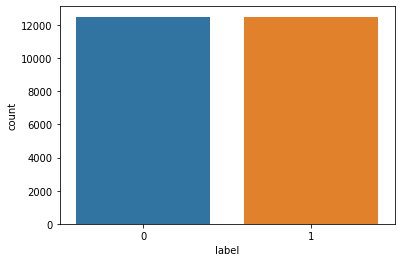

In [ ]:
sns.countplot(df['label'])

In [15]:
#input split into training and validation set
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
train.head()

,images,label
23288,PetImages/Dog/10136.jpg,1
17782,PetImages/Dog/3693.jpg,1
1020,PetImages/Cat/8811.jpg,0
12645,PetImages/Dog/2758.jpg,1
1533,PetImages/Cat/1841.jpg,0


In [ ]:
len(train)

19998

In [ ]:
len(test)

5000

In [ ]:
test.head()

,images,label
6869,PetImages/Dog/2089.jpg,1
22912,PetImages/Dog/11509.jpg,1
9669,PetImages/Cat/5072.jpg,0
13639,PetImages/Cat/5102.jpg,0
23339,PetImages/Dog/3290.jpg,1


In [16]:
# Image augmentation – A refresher
# Image augmentation is a technique of applying different transformations to original images 
# which results in multiple transformed copies of the same image. Each copy, however, is different 
# from the other in certain aspects depending on the augmentation techniques you apply like shifting, 
# rotating, flipping, etc.

# Applying these small amounts of variations on the original image does not change its target class 
# but only provides a new perspective of capturing the object in real life. And so, we use it is quite 
# often for building deep learning models.

# These image augmentation techniques not only expand the size of your dataset but also incorporate a level 
# of variation in the dataset which allows your model to generalize better on unseen data. Also, the model 
# becomes more robust when it is trained on new, slightly altered images.

# So, with just a few lines of code, you can instantly create a large corpus of similar images without having 
# to worry about collecting new images, which is not feasible in a real-world scenario. Now, let’s see how 
# it’s done with the good old Keras library!


#Image/Data augmentation for the training set to prevent overfitting 
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
  rescale = 1./255, 
  #Rescale is a value by which we will multiply the data before any other processing. 
  #Our original images consist in RGB coefficients in the 0-255, but such values would be 
  #too high for our model to process (given a typical learning rate), 
  #so we convert the pixels in range [0,255] to range [0,1]  by scaling with a 1./255 factor
  rotation_range = 40,
  shear_range = 0.2,
  zoom_range = 0.2,
  horizontal_flip = True,
  fill_mode = 'nearest' 
  )

val_generator = ImageDataGenerator(rescale = 1./255) # we do not augment images in the validation set

train_iterator = train_generator.flow_from_dataframe( 
    df,
    x_col='images',
    y_col = 'label',
    target_size = (128,128),
    batch_size = 512,
    class_mode = 'binary'
)

val_iterator = val_generator.flow_from_dataframe(
    df,
    x_col='images',
    y_col = 'label',
    target_size = (128,128),
    batch_size = 512,
    class_mode = 'binary'
)

Found 24998 validated image filenames belonging to 2 classes.
Found 24998 validated image filenames belonging to 2 classes.


## Creating the Model using CNN

In [31]:
# Creating a 3 layered convolutional neural network model
import tensorflow as tf
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
                    # 16 neuron layer
                    Conv2D(16, (3,3), activation='relu', input_shape=(128, 128,3)), #(128,128,3) means its a 128 x 128 RGB image
                    # (3,3) is the kernel or filter size with which we convolve the image. 
                    # the activation function we used here is relu(Rectified Linear Unit)
                    # some other activation functions that we could have used are:
                    # 1. sigmoid function
                    # 2. softmax function
                    # 3. softplus function
                    # 4. softsign function
                    # 5. tanh function
                    # 6. selu function
                    # 7. elu function
                    # 8. exponential function
                    
                    # The ReLU function is 𝑓(𝑥)=max(0,𝑥)
                    # Why are ReLUs better than other activation functions? 
                    # They are simple, fast to compute, and don't suffer from vanishing gradients, 
                    # like sigmoid functions (logistic, tanh, erf, and similar).

                    # if the image is less than 128*128 then it is recommended to use a 1x1 or 3x3 kernel size.
                    # For higher dimensions we may go for 5x5 or 7x7 kernel size
                    MaxPool2D((2,2)), 
                    # we could have also used strided convolution to reduce spatial dimensions as given below
                    # Conv2D(16, 3, strides=(2, 2), activation='relu')
                    # strides is the number of pixels we move to the right when the kernel shifts. By default it is 1


                    # 32 neuron layer
                    Conv2D(32,(3,3), activation = 'relu'),
                    MaxPool2D((2,2)),
                    # 64 neuron layer
                    Conv2D(64, (3,3), activation = 'relu'),
                    MaxPool2D((2,2)),
                    Flatten(), #using flatten() to convert the data in 1-D
                    Dense(512, activation ='relu'),
                    Dense(1, activation = 'sigmoid')
])




In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [ ]:
history = model.fit(train_iterator, epochs = 50, validation_data=val_iterator)

Epoch 1/50
49/49 [==============================] - 213s 4s/step - loss: 0.7180 - accuracy: 0.5388 - val_loss: 0.6489 - val_accuracy: 0.6311
Epoch 2/50
49/49 [==============================] - 197s 4s/step - loss: 0.6170 - accuracy: 0.6615 - val_loss: 0.5974 - val_accuracy: 0.6911
Epoch 3/50
49/49 [==============================] - 197s 4s/step - loss: 0.5618 - accuracy: 0.7087 - val_loss: 0.5109 - val_accuracy: 0.7515
Epoch 4/50
49/49 [==============================] - 197s 4s/step - loss: 0.5204 - accuracy: 0.7412 - val_loss: 0.4832 - val_accuracy: 0.7690
Epoch 5/50
49/49 [==============================] - 197s 4s/step - loss: 0.4895 - accuracy: 0.7608 - val_loss: 0.4736 - val_accuracy: 0.7673
Epoch 6/50
49/49 [==============================] - 197s 4s/step - loss: 0.4777 - accuracy: 0.7685 - val_loss: 0.4713 - val_accuracy: 0.7799
Epoch 7/50
49/49 [==============================] - 196s 4s/step - loss: 0.4543 - accuracy: 0.7849 - val_loss: 0.4083 - val_accuracy: 0.8152
Epoch 8/50
49

## Visualization Results

<Figure size 432x288 with 0 Axes>

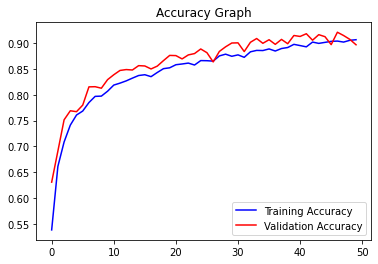

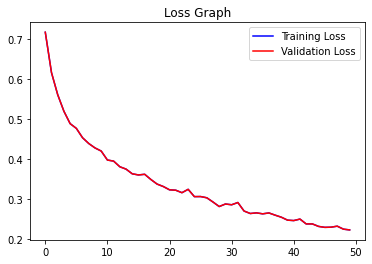

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.figure()